In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
def create_LeNet(image_size = (28, 28)):
    model = tf.keras.Sequential([
        # tf.keras.layers.Rescaling(1./255),
        keras.layers.Conv2D(filters=6, kernel_size=5, strides=1, input_shape = image_size, activation="relu"), # param increase here
        keras.layers.MaxPooling2D(pool_size = 2, strides = 2),
        keras.layers.Conv2D(16, 5, 1, activation='relu'),
        keras.layers.MaxPooling2D(pool_size = 2, strides = 2),
        keras.layers.Flatten(),
        keras.layers.Dense(120, activation='relu'), # param increase here
        keras.layers.Dense(84, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    return model

In [38]:
img_size_list = []
n_params_list = []

for i in range(1,16):
    # dummy image
    img_shape = (32*i, 32*i, 3)
    img = np.random.randint(0, 255, img_shape)
    img_expanded = np.expand_dims(img, axis=0)
    # built-in model - doesn't change no. of parameters with image shape 
    # processed_img = tf.keras.applications.vgg16.preprocess_input(img_expanded) 
    # model = tf.keras.applications.VGG16(input_shape = img_shape, classes=10, include_top=False, weights=None)
    # custom model
    model = create_LeNet(img_shape)
    model.predict(img_expanded)
    # get model stats
    n_params = model.count_params()
    print(f"Image shape:{img_shape[0]}, No. of params:{n_params}")
    # append to list
    img_size_list.append(img_shape[0])
    n_params_list.append(n_params)

Image shape:32, No. of params:62006
Image shape:64, No. of params:338486
Image shape:96, No. of params:860726
Image shape:128, No. of params:1628726
Image shape:160, No. of params:2642486
Image shape:192, No. of params:3902006
Image shape:224, No. of params:5407286
Image shape:256, No. of params:7158326
Image shape:288, No. of params:9155126
Image shape:320, No. of params:11397686
Image shape:352, No. of params:13886006
Image shape:384, No. of params:16620086
Image shape:416, No. of params:19599926
Image shape:448, No. of params:22825526
Image shape:480, No. of params:26296886


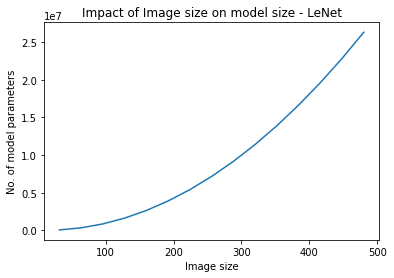

In [39]:
plt.plot(img_size_list, n_params_list)
plt.xlabel("Image size")
plt.ylabel("No. of model parameters")
plt.title("Impact of Image size on model size - LeNet")
plt.show()